In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

from importlib import reload

import warnings
warnings.filterwarnings("ignore")

import wrangle as wr
sns.set(rc={'figure.facecolor':'fbf3e4','axes.facecolor':'fbf3e4'})
#sns.set(font_scale=1.5)
pd.options.display.float_format = '{:,.3f}'.format

In [128]:
reload(wr)

<module 'wrangle' from '/Users/nadina/codeup-data-science/zillow-project/wrangle.py'>

In [2]:
zillow = wr.get_zillow()

In [130]:
zillow.shape

(50447, 9)

In [131]:
50516 - 50447

69

In [111]:
zillow.describe()

,bedrooms,bathrooms,sq_feet,lot_sqft,year_built,house_age,pools,home_value
count,"50,516.000","50,516.000","50,516.000","50,516.000","50,516.000","50,516.000","50,516.000","50,516.000"
mean,3.268,2.165,"1,835.569","10,704.999","1,962.884",54.116,0.202,"453,672.591"
std,0.891,0.867,792.386,"86,543.086",22.685,22.685,0.401,"380,819.689"
min,0.000,0.000,128.000,236.000,"1,878.000",1.000,0.000,"1,000.000"
25%,3.000,2.000,"1,259.000","5,544.000","1,950.000",39.000,0.000,"189,120.750"
50%,3.000,2.000,"1,636.000","6,776.000","1,960.000",57.000,0.000,"364,188.000"
75%,4.000,3.000,"2,238.000","8,571.250","1,978.000",67.000,0.000,"591,768.000"
max,6.000,6.000,"5,110.000","6,971,010.000","2,016.000",139.000,1.000,"2,499,000.000"


In [28]:
zillow.isnull().sum()

bedrooms       0
bathrooms      0
sq_feet        0
lot_sqft       0
year_built     0
house_age      0
pools          0
county_name    0
home_value     0
dtype: int64

In [29]:
zillow.shape

(51035, 9)

In [3]:
train, validate, test = wr.split_zillow(zillow)

In [133]:
train.shape

(28249, 9)

In [134]:
validate.shape

(12108, 9)

In [135]:
test.shape

(10090, 9)

### Explore

In [38]:
train.head()

,bedrooms,bathrooms,sq_feet,lot_sqft,year_built,house_age,pools,county_name,home_value
41747,2,3,1339,5867,1958,59,0,LA,1346194
33556,3,2,1472,3478,1977,40,0,Orange,423457
28541,5,4,3600,11705,1946,71,1,LA,344419
51109,3,2,1485,12291,1949,68,0,LA,1187756
25635,3,2,2006,6860,1952,65,0,LA,575000


In [39]:
!ls

README.1md.md              env.py
README.md                  evaluate.py
__pycache__                explore.py
draft-wrangle.ipynb        viz.py
draft-zillow-project.ipynb wrangle.py
draft_explore.ipynb        zillow.csv


In [40]:
!code explore.py

In [41]:
import explore as ex

In [50]:
reload(ex)

<module 'explore' from '/Users/nadina/codeup-data-science/zillow-project/explore.py'>

,bedrooms,bathrooms,sq_feet,lot_sqft,year_built,house_age,pools,home_value
bedrooms,1.000,0.616,0.658,0.266,0.425,-0.425,0.241,0.275
bathrooms,0.616,1.000,0.801,0.307,0.529,-0.529,0.286,0.434
sq_feet,0.658,0.801,1.000,0.380,0.526,-0.526,0.330,0.509
lot_sqft,0.266,0.307,0.380,1.000,0.080,-0.080,0.331,0.123
year_built,0.425,0.529,0.526,0.080,1.000,-1.000,0.117,0.262
house_age,-0.425,-0.529,-0.526,-0.080,-1.000,1.000,-0.117,-0.262
pools,0.241,0.286,0.330,0.331,0.117,-0.117,1.000,0.226
home_value,0.275,0.434,0.509,0.123,0.262,-0.262,0.226,1.000


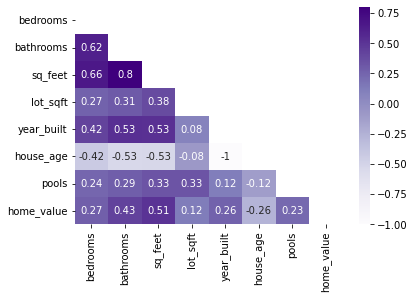

In [44]:
ex.correlation_and_heatmap(train)

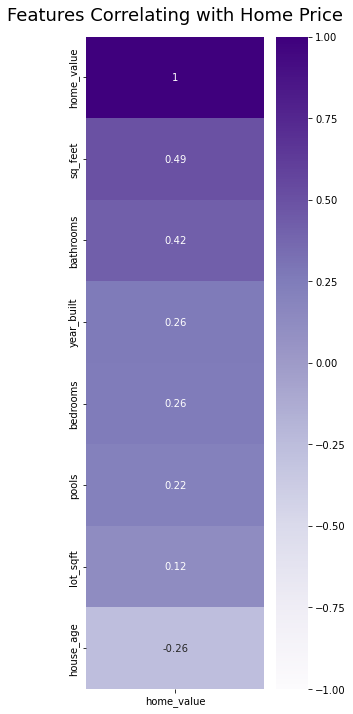

In [136]:
# viz from Rae
plt.figure(figsize=(4, 12))
heatmap = sns.heatmap(train.corr(method='spearman')[['home_value']].sort_values(by='home_value', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Purples')
heatmap.set_title('Features Correlating with Home Price', fontdict={'fontsize':18}, pad=16);

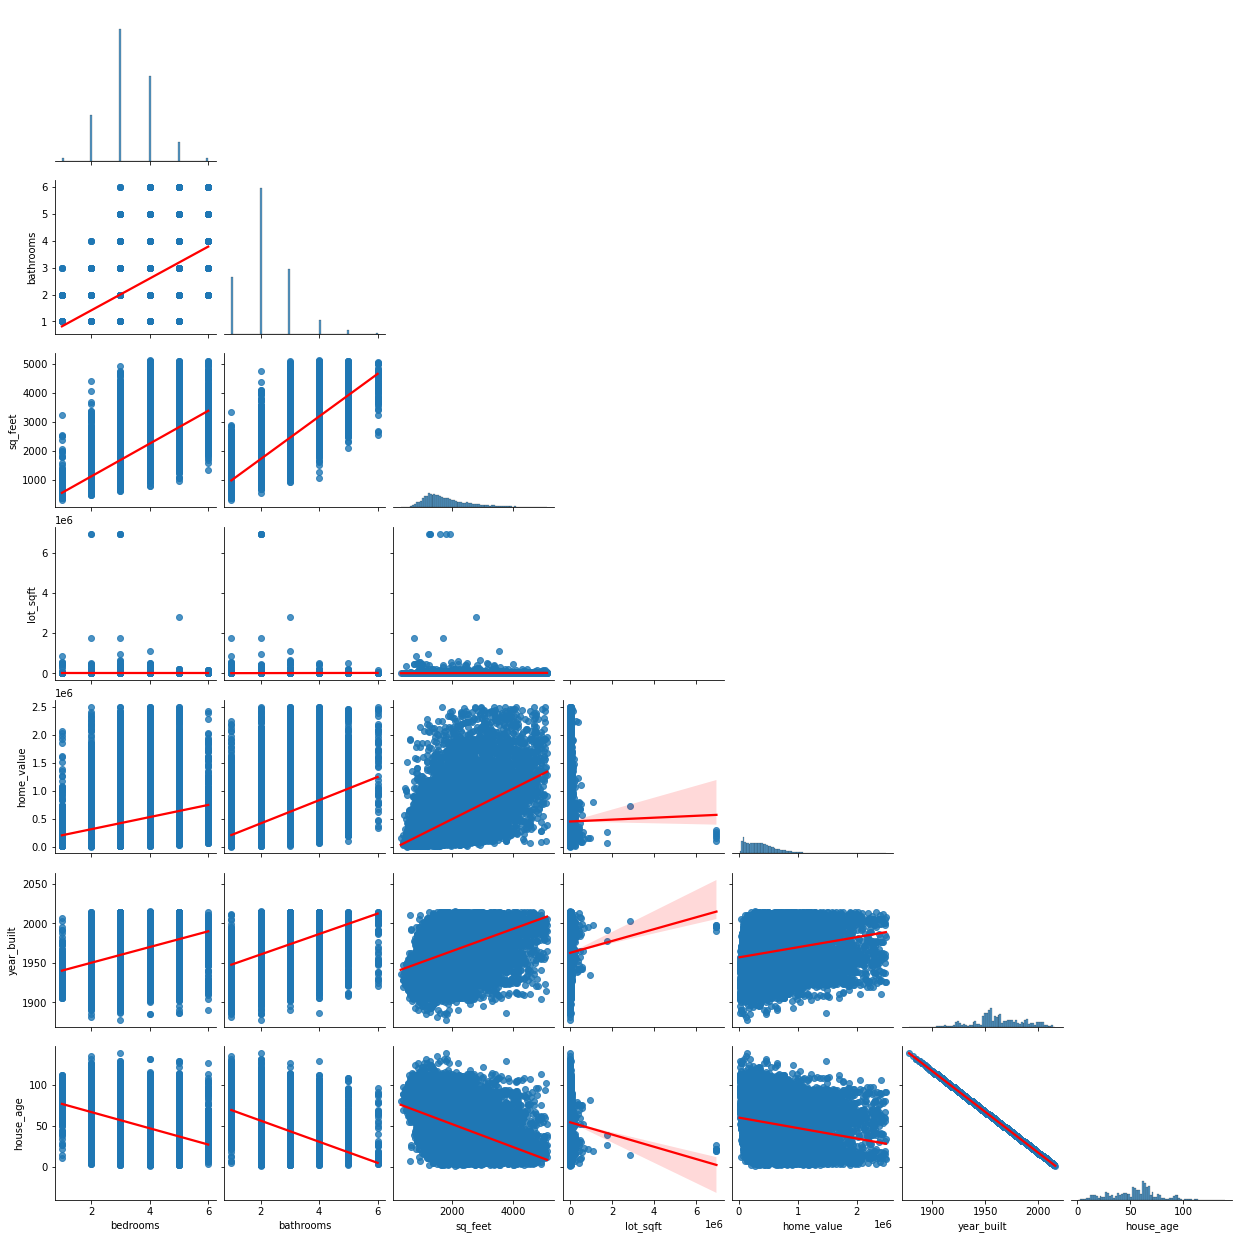

In [137]:
ex.pairplot_data(train)

In [101]:
log_lot = np.log(train.lot_sqft)
#log_lot = train.sq_feet ** 2

In [143]:
sns.jointplot?

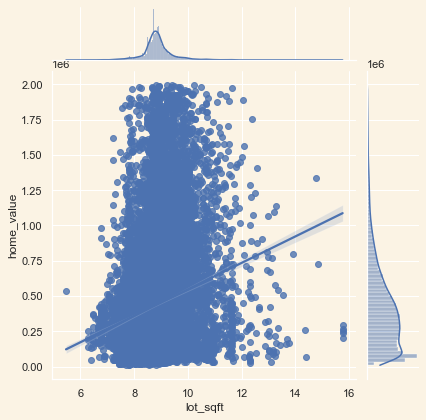

In [102]:
sns.jointplot(x=log_lot, y=train.home_value, kind='reg')

In [81]:
train.head(1)

,bedrooms,bathrooms,sq_feet,lot_sqft,year_built,house_age,pools,county_name,home_value
41747,2,3,1339,5867,1958,59,0,LA,1346194


In [87]:
reload(ex)

<module 'explore' from '/Users/nadina/codeup-data-science/zillow-project/explore.py'>

Categorical Variables:


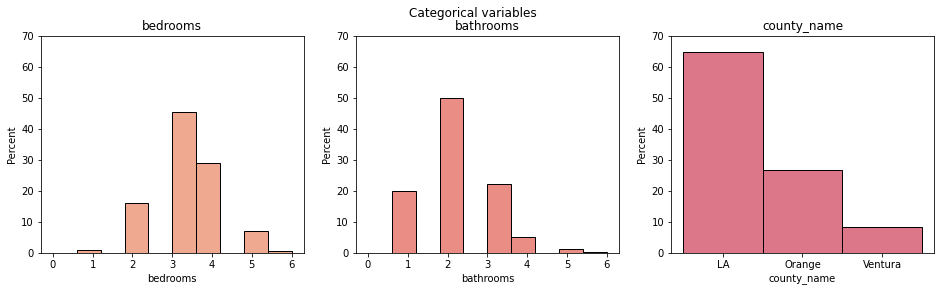

In [86]:
ex.show_categ_vars(train)

Continuous Variables:


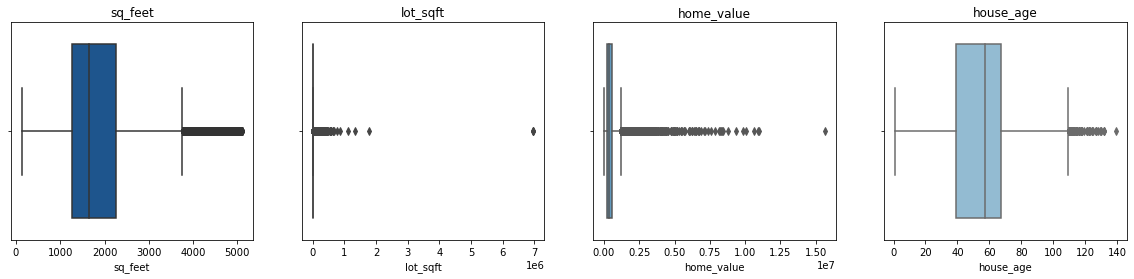

In [88]:
ex.show_cont_vars(train)

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
def vif(df):
    vif_data = pd.DataFrame()
    vif_data['features'] = df.drop(columns='county_name').columns
    vif_data['VIF'] = [variance_inflation_factor(df.drop(columns='county_name').\
                                                 values, i) for i in range(len(df.columns)-1)]
    display(vif_data.sort_values(by='VIF', ascending=False))

In [79]:
vif(train)

,features,VIF
4,year_built,33.854
5,house_age,8.475
2,sq_feet,3.768
1,bathrooms,3.176
0,bedrooms,1.826
7,home_value,1.433
6,pools,1.148
3,lot_sqft,1.003


##### ```year_built``` can not go to the linear regression models.

### 1. Are the home prices vary in three different counties?

*Visualizations*

In [171]:
train.describe()

,bedrooms,bathrooms,sq_feet,lot_sqft,year_built,house_age,pools,home_value
count,"28,249.000","28,249.000","28,249.000","28,249.000","28,249.000","28,249.000","28,249.000","28,249.000"
mean,3.274,2.168,"1,834.410","11,173.821","1,962.783",54.217,0.202,"454,398.279"
std,0.876,0.857,785.020,"106,003.969",22.586,22.586,0.402,"380,443.374"
min,1.000,1.000,300.000,236.000,"1,878.000",1.000,0.000,"9,242.000"
25%,3.000,2.000,"1,264.000","5,533.000","1,950.000",39.000,0.000,"188,729.000"
50%,3.000,2.000,"1,640.000","6,776.000","1,960.000",57.000,0.000,"365,632.000"
75%,4.000,3.000,"2,230.000","8,544.000","1,978.000",67.000,0.000,"593,732.000"
max,6.000,6.000,"5,108.000","6,971,010.000","2,016.000",139.000,1.000,"2,495,513.000"


In [236]:
def price_distribution(df):
    plt.figure(figsize = (10, 6), facecolor='#fbf3e4')
    plt.suptitle('Home price distribution in the data set', fontsize = 20)
    bins = np.arange(0, 2_500_500, 100_000).astype(int)
    ax = sns.histplot(data=df, x = 'home_value',stat='percent', bins=bins,  kde=True)
    plt.vlines(df.home_value.mean(), 0, 12, color=(0.82, 0.29, 0.38), label='mean price')
    plt.vlines(df.home_value.median(), 0, 14, color='blue', label='median price')
    plt.xlabel('Price till $2.5 Million', fontsize=16)
    plt.ylabel('Percentage', fontsize=16)
    plt.text(1_500_500, 6, 'each bin = $ 100,000')
    plt.text(1_500_500, 9, f'mean - median = {round(df.home_value.mean() - df.home_value.median(), 2)}')
    plt.legend()

    plt.show()

In [9]:
!code explore.py

In [93]:
reload(wr)

<module 'wrangle' from '/Users/nadina/codeup-data-science/zillow-project/wrangle.py'>

In [94]:
df=wr.get_zillow()

In [95]:
train, validate, test = wr.split_zillow(df)

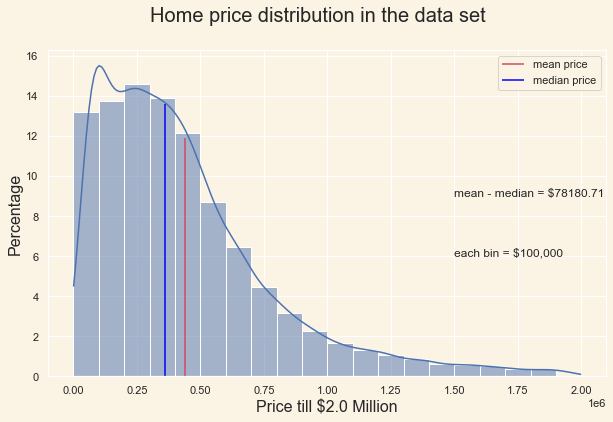

In [62]:
plt.figure(figsize = (10, 6), facecolor='#fbf3e4')
plt.suptitle('Home price distribution in the data set', fontsize = 20)
bins = np.arange(0, 2_000_000, 100_000).astype(int)
ax = sns.histplot(data=train, x = 'home_value',stat='percent', bins=bins,  kde=True)
plt.vlines(train.home_value.mean(), 0, 11.9, color=(0.82, 0.29, 0.38), label='mean price')
plt.vlines(train.home_value.median(), 0, 13.6, color='blue', label='median price')
plt.xlabel('Price till $2.0 Million', fontsize=16)
plt.ylabel('Percentage', fontsize=16)
plt.text(1_500_500, 6, 'each bin = $100,000')
plt.text(1_500_500, 9, f'mean - median = ${round(train.home_value.mean() - train.home_value.median(), 2)}')
plt.legend()

plt.show()

In [ ]:
reload(ex)

In [162]:
sns.barplot?

In [ ]:
'flare', 'Blues_r', 'PuRd_r', 'Accent'

In [197]:
sns.color_palette('Blues_r')

[(0.044059976931949255, 0.3338869665513264, 0.6244521337946944),
 (0.16696655132641294, 0.48069204152249134, 0.7291503267973857),
 (0.3262898885044214, 0.6186236063052672, 0.802798923490965),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.8584083044982699, 0.9134486735870818, 0.9645674740484429)]

In [206]:
sns.color_palette('Accent')[-1]

(0.4, 0.4, 0.4)

In [282]:
sns.color_palette('flare')

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

In [195]:
sns.color_palette('PuRd_r')

[(0.6234832756632065, 0.009134948096885814, 0.2723875432525952),
 (0.8362937331795464, 0.09676278354479047, 0.3964321414840446),
 (0.892718185313341, 0.25951557093425603, 0.6037062668204537),
 (0.8244367550941946, 0.5030526720492119, 0.7425451749327182),
 (0.8188542868127644, 0.6833833141099577, 0.833279507881584),
 (0.896239907727797, 0.8620530565167244, 0.9265974625144175)]

In [180]:
sns.color_palette('GnBu_r')

[(0.04913494809688582, 0.4261130334486736, 0.6836447520184545),
 (0.2084582852748943, 0.5934025374855825, 0.7689965397923876),
 (0.3799307958477509, 0.7430988081507113, 0.8027681660899654),
 (0.5847750865051903, 0.8386928104575164, 0.7344867358708189),
 (0.7590311418685122, 0.9056362937331796, 0.7543406382160708),
 (0.8682814302191465, 0.9488811995386389, 0.8476585928489042)]

In [185]:
sns.color_palette('Dark2')[0] (0.1059, 0.6196, 0.467)

(0.10588235294117647, 0.6196078431372549, 0.4666666666666667)

In [207]:
def viz_counties(df):
    plt.figure(figsize=(18, 6))

    plt.suptitle('Home prices in different counties', fontsize=20)
    plt.subplot(121)
    graph = sns.barplot(x='county_name', y='home_value', estimator=np.median, data=df, palette='flare')
    graph.axhline(df.home_value.median(), color = (0.4, 0.4, 0.4), label = 'median')
    plt.title('Median', fontsize=16)
    plt.ylim(0, 550_000)
    plt.legend()

    plt.subplot(122)
    graph = sns.barplot(x='county_name', y='home_value', data=df, palette='Accent')
    graph.axhline(df.home_value.median(), color = (0.4, 0.4, 0.4), label = 'mean')
    plt.title('Mean', fontsize=16)
    plt.ylim(0, 550_000)
    plt.legend()

    plt.show()

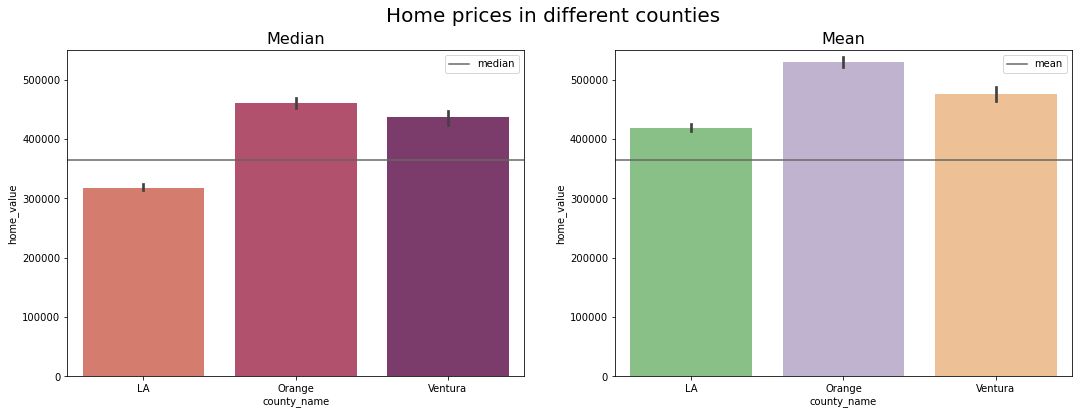

In [208]:
viz_counties(train)

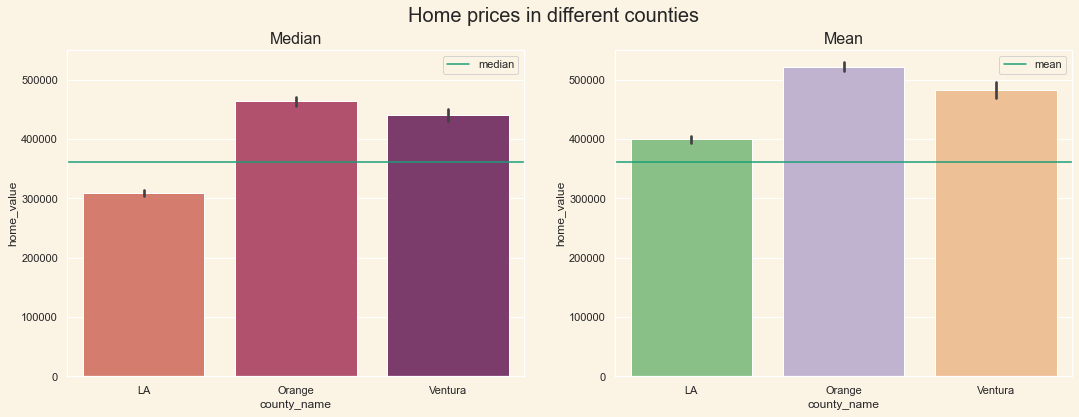

In [72]:
plt.figure(figsize=(18, 6), facecolor='#fbf3e4')

plt.suptitle('Home prices in different counties', fontsize=20)
plt.subplot(121)
graph = sns.barplot(x='county_name', y='home_value', estimator=np.median, data=train, palette='flare')
graph.axhline(train.home_value.median(), color = (0.1059, 0.6196, 0.467), label = 'median')
plt.title('Median', fontsize=16)
plt.ylim(0, 550_000)
plt.legend()

plt.subplot(122)
graph = sns.barplot(x='county_name', y='home_value', data=train, palette='Accent')
graph.axhline(train.home_value.median(), color = (0.1059, 0.6196, 0.467), label = 'mean')
plt.title('Mean', fontsize=16)
plt.ylim(0, 550_000)
plt.legend()

plt.show()

$H_0:$  There is no significant difference between ```home_value``` in different ```county_name``` counties.

$H_a:$  There is a significant difference between ```home_value``` in different  ```county_name``` counties.

In [117]:
# create 3 data sets that keep the values of the counties

la = train[train.county_name == 'LA'] # LA county
ventura = train[train.county_name == 'Ventura'] # Ventura county
orange = train[train.county_name == 'Orange'] # Orange county

In [121]:
la.shape, ventura.shape, orange.shape

((18240, 9), (2359, 9), (7689, 9))

In [241]:
alpha = 0.05
p = stats.levene(la.home_value, orange.home_value, ventura.home_value)[1]
if (p < alpha):
    print('Variances are different. Use an non-parametric test.')
else:
    print('Variances are equal. Use a parametric test')

Variances are different. Use an non-parametric test.


In [244]:
p_kr = stats.kruskal(la.home_value, orange.home_value, ventura.home_value)[1]
if (p_kr < alpha):
    print('We reject the null hypothesis.')
    print('There is a significant difference in home prices in different counties.')
else:
    print('We fail to reject the null hypothesis.')
    print('There is no significant difference in home prices in different counties.')

We reject the null hypothesis.
There is a significant difference in home prices in different counties.


In [251]:
test_counties(train)

Variances are different. Use an non-parametric test.

We reject the null hypothesis.
There is a significant difference in home prices in different counties.


In [250]:
def test_counties(df):
    '''
    the function accepts a zillow data set as a parameter, splits it into 3 data sets
    where each represents separate county
    run the Levene tests to check the assumptions and runs the Kruskal-Wallis stat test
    that compares means of the samples
    '''
    # create 3 data sets that keep the values of the counties
    la = df[train.county_name == 'LA'] # LA county
    ventura = df[train.county_name == 'Ventura'] # Ventura county
    orange = df[train.county_name == 'Orange'] # Orange county
    
    # Levene test
    p = stats.levene(la.home_value, orange.home_value, ventura.home_value)[1]
    if (p < alpha):
        print('Variances are different. Use an non-parametric Kruskal-Wallis test.')
    else:
        print('Variances are equal. Use a parametric ANOVA test')
    
    print()
    
    # Kruskal-Wallis test
    p_kr = stats.kruskal(la.home_value, orange.home_value, ventura.home_value)[1]
    if (p_kr < alpha):
        print('We reject the null hypothesis.')
        print('There is a significant difference in home prices in different counties.')
    else:
        print('We fail to reject the null hypothesis.')
        print('There is no significant difference in home prices in different counties.')

### 2. Do houses with pools cost more than the houses without pool?

In [333]:
def pools_viz(df):
    '''
    the function accepts a zillow data frame as a parameter and creates 2 plots
    that show a difference between houses with pools and without pools
    '''
    plt.figure(figsize=(18, 6), facecolor='#fbf3e4')

    plt.suptitle('Prices for homes with and without pool', fontsize=20)
    
    # subplot 1 houses with pool prices in different counties
    plt.subplot(121)
    graph = sns.barplot(x='pools', y='home_value', estimator=np.median, hue='county_name', data=df, palette='flare')
    graph.axhline(df.home_value.median(), label='median price')
    plt.title('Prices in different counties', fontsize=16)
    plt.ylim(0, 700_000)
    plt.legend()

    # subplot 2 houses with pool prices in the data set
    plt.subplot(122)
    graph = sns.barplot(x='pools', y='home_value', data=df, estimator=np.median, palette='Accent')
    graph.axhline(df.home_value.median(), label='median price')
    plt.ylim(0, 700_000)
    plt.title('Overall prices', fontsize=16)
    plt.legend()

    plt.show()

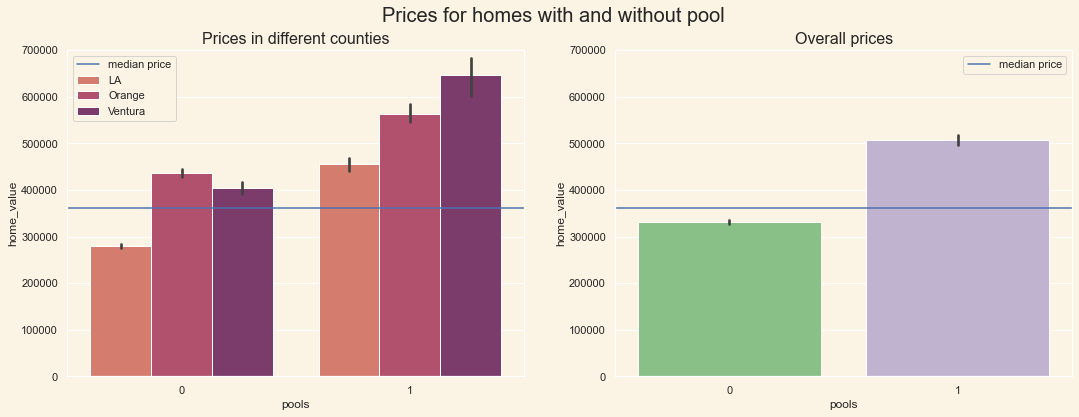

In [64]:

plt.figure(figsize=(18, 6), facecolor='#fbf3e4')

plt.suptitle('Prices for homes with and without pool', fontsize=20)
plt.subplot(121)
graph = sns.barplot(x='pools', y='home_value', estimator=np.median, hue='county_name', data=train, palette='flare')
graph.axhline(train.home_value.median(), label='median price')
plt.title('Prices in different counties', fontsize=16)
plt.ylim(0, 700_000)
plt.legend()

plt.subplot(122)
graph = sns.barplot(x='pools', y='home_value', data=train, estimator=np.median, palette='Accent')
graph.axhline(train.home_value.median(), label='median price')
plt.ylim(0, 700_000)
plt.title('Overall prices', fontsize=16)
plt.legend()

plt.show()

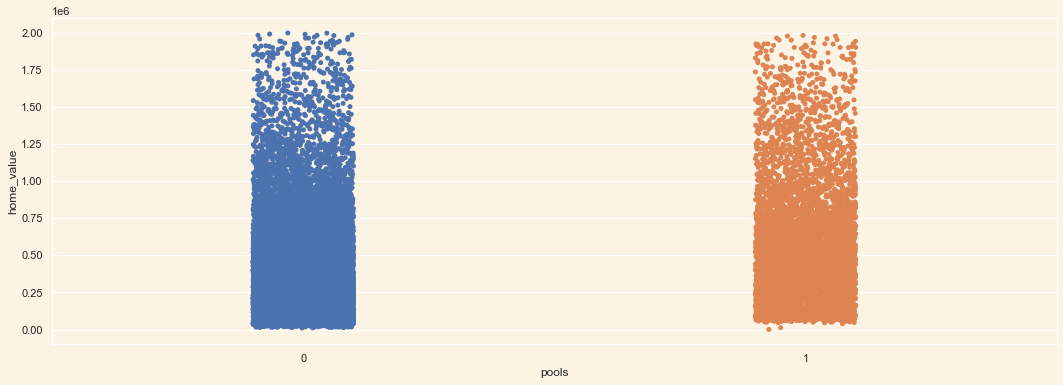

In [68]:
plt.figure(figsize=(18, 6), facecolor='#fbf3e4')
sns.stripplot(x='pools', y='home_value', data=train);

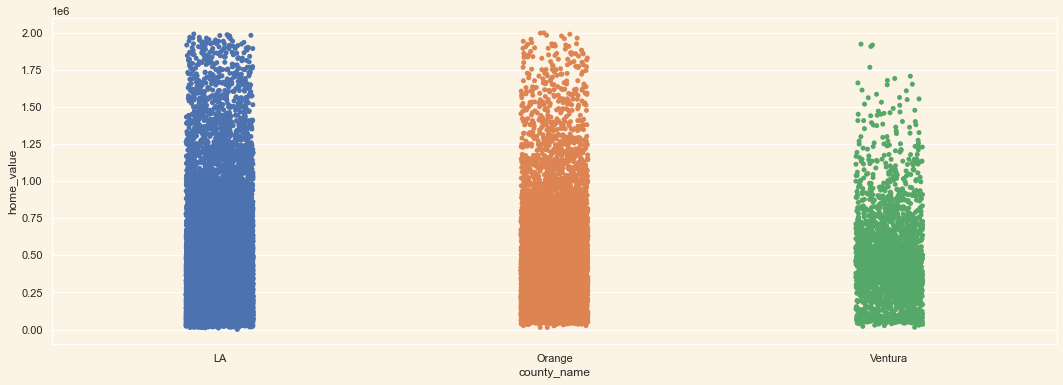

In [70]:
plt.figure(figsize=(18, 6), facecolor='#fbf3e4')
sns.stripplot(x='county_name', y='home_value', data=train);

### 3. Is there a correlation between a square feet of the house and its price?

In [331]:
sns.color_palette('flare')[4] 

(0.56041794, 0.19845221, 0.44207535)

In [284]:
sns.jointplot?

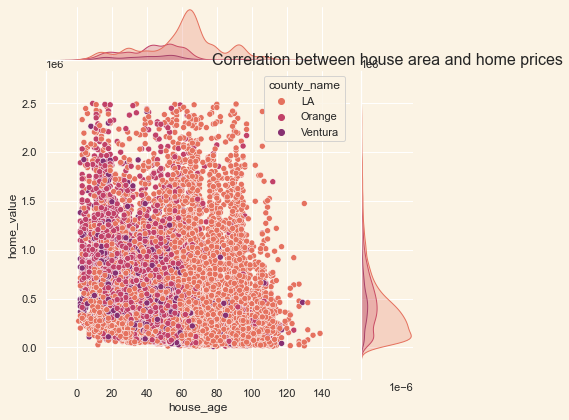

In [53]:
#plt.figure(figsize=(18, 6), facecolor='#fbf3e4')

#plt.suptitle('Correlation between house area and home prices', fontsize=20)

sns.jointplot(x='house_age', y='home_value', data=train, kind='scatter', hue='county_name', palette='flare')
plt.title('Correlation between house area and home prices', fontsize=16);


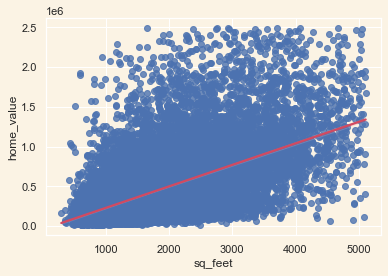

In [317]:
sns.regplot(x='sq_feet', y='home_value', data=train,
             line_kws={'color':(0.819, 0.289, 0.381)});

<AxesSubplot:xlabel='sq_feet', ylabel='home_value'>

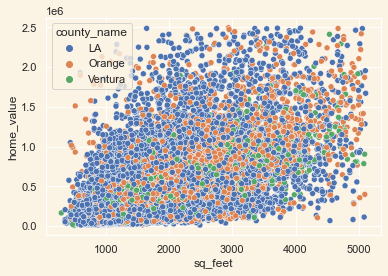

In [318]:
sns.scatterplot(x='sq_feet', y='home_value', data=train, hue='county_name');

In [ ]:
def sqft_price_viz(df):
    plt.figure(figsize=(18, 6), facecolor='#fbf3e4')

    plt.suptitle('Correlation between house area and home prices', fontsize=20)

    plt.subplot(121)
    sns.regplot(x='sq_feet', y='home_value', data=df,
                 line_kws={'color':(0.56, 0.198, 0.442)});
    plt.title('With regression line', fontsize=16)

    plt.subplot(122)
    sns.scatterplot(x='sq_feet', y='home_value', data=df, hue='county_name', palette='flare')
    plt.title('With county highlights', fontsize=16)

    plt.show()

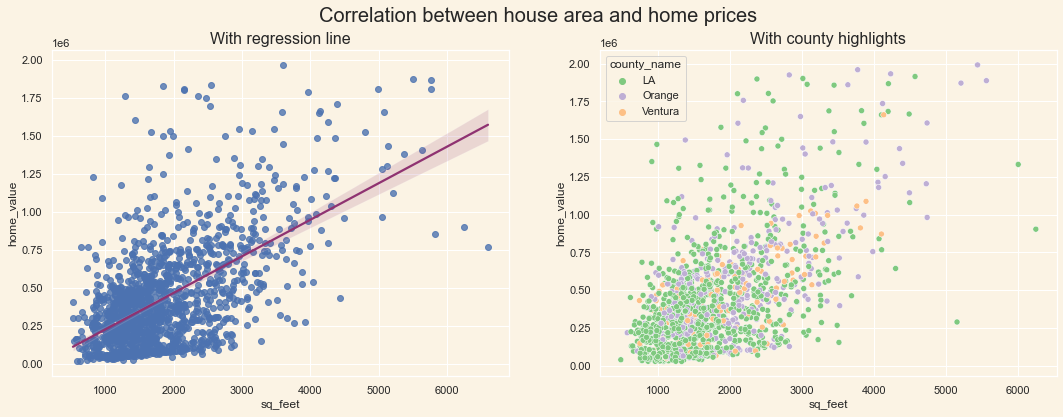

In [96]:
plt.figure(figsize=(18, 6), facecolor='#fbf3e4')

plt.suptitle('Correlation between house area and home prices', fontsize=20)

plt.subplot(121)
sns.regplot(x='sq_feet', y='home_value', data=train.sample(frac=0.05),
             line_kws={'color':(0.56, 0.198, 0.442)});
plt.title('With regression line', fontsize=16)

plt.subplot(122)
sns.scatterplot(x='sq_feet', y='home_value', data=train.sample(frac=0.05), hue='county_name', palette='Accent')
plt.title('With county highlights', fontsize=16)

plt.show()

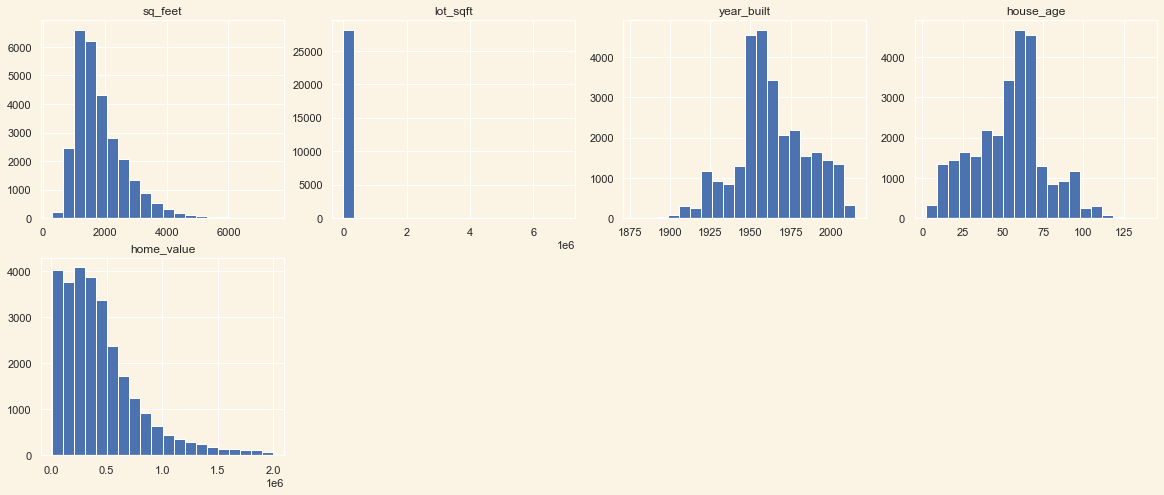

In [97]:
cv = ['sq_feet', 'lot_sqft', 'year_built', 'house_age','home_value']
plt.figure(figsize=(20,8))
for i, col in enumerate(cv):
    #h =  ((i+2) // 4)
    subplot_number = (i+1) 
    plt.subplot(2, 4, subplot_number)
    plt.title(col)
    train[col].hist(bins = 20)

$H_0:$  There is no linear correlation between ```home_value``` and ```sq_feet```

$H_a:$  There is a linear correlation between ```home_value``` and ```sq_feet```

*Assumptions to be met:*
- Linear
- Independent 
- Normal
- Equal variances - fail
- Random

We don't have equal variances and there are outliers in both ```sq_feet``` and ```home_values``` columns. To check if there is a correlation between square feet and home price I'll use **Spearman's rank correlation test**

In [ ]:
def sqfeet_test(df):
    '''
    the function accepts a zillow data frame as a parameter
    runs a Spearman's rank correlation test and prints it results
    '''
    corr, p = stats.spearmanr(df.sq_feet, df.home_value)
    if (p < alpha):
        print('We reject the null hypothesis.')
        print('There is a linear correlation between home price and its size(square feet)')
        print(f'The correlation coefficient is {round(corr, 2)}')
    else:
        print('We fail to reject the null hypothesis.')
        print('There is no linear correlation between home price and its size(square feet)')

In [336]:
corr, p = stats.spearmanr(train.sq_feet, train.home_value)

In [338]:
if (p < alpha):
    print('We reject the null hypothesis.')
    print('There is a linear correlation between home price and its size(square feet)')
    print(f'The correlation coefficient is {round(corr, 2)}')
else:
    print('We fail to reject the null hypothesis.')
    print('There is no linear correlation between home price and its size(square feet)')

We reject the null hypothesis.
There is a linear correlation between home price and its size(square feet)
The correlation coefficient is 0.49


In [334]:
train.describe()

,bedrooms,bathrooms,sq_feet,lot_sqft,year_built,house_age,pools,home_value
count,"28,249.000","28,249.000","28,249.000","28,249.000","28,249.000","28,249.000","28,249.000","28,249.000"
mean,3.274,2.168,"1,834.410","11,173.821","1,962.783",54.217,0.202,"454,398.279"
std,0.876,0.857,785.020,"106,003.969",22.586,22.586,0.402,"380,443.374"
min,1.000,1.000,300.000,236.000,"1,878.000",1.000,0.000,"9,242.000"
25%,3.000,2.000,"1,264.000","5,533.000","1,950.000",39.000,0.000,"188,729.000"
50%,3.000,2.000,"1,640.000","6,776.000","1,960.000",57.000,0.000,"365,632.000"
75%,4.000,3.000,"2,230.000","8,544.000","1,978.000",67.000,0.000,"593,732.000"
max,6.000,6.000,"5,108.000","6,971,010.000","2,016.000",139.000,1.000,"2,495,513.000"


### 4.  Are the new houses more valuable than the old ones?

In [42]:
sns.color_palette("colorblind", 9)

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2)]

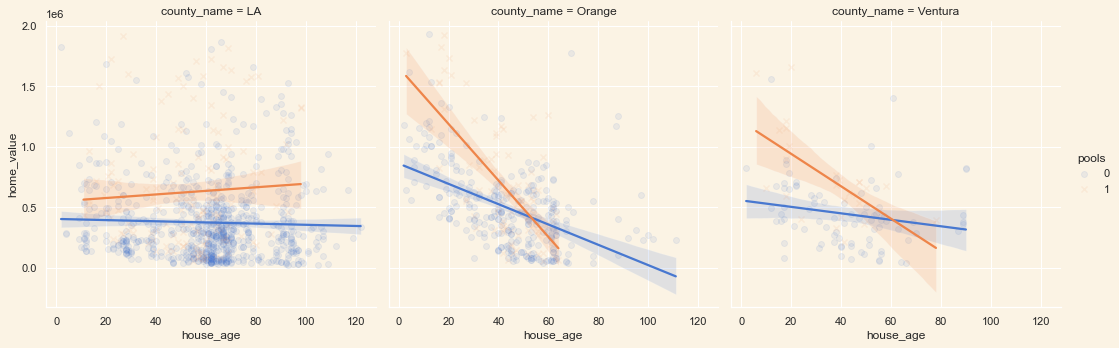

In [86]:
#
sns.lmplot(x='house_age', y='home_value', data=train.sample(frac=0.05), 
           palette='muted', col='county_name', hue='pools', 
           scatter_kws = {'alpha' : 0.09}, markers=["o", "x"] ); # orange pools, blue no pools

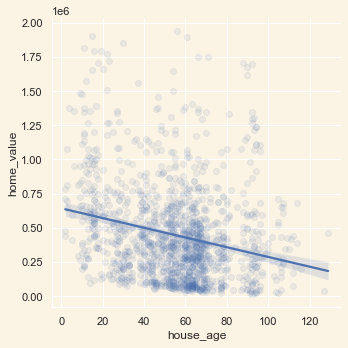

In [89]:
sns.lmplot(x='house_age', y='home_value', data=train.sample(frac=0.05), scatter_kws = {'alpha' : 0.09});

House age correlates differently with price based on the county. If we take to the consideration the overall data set, we obtain the slight negative correlation. If we split the data by county and highlight by the pool availability, we get the posive correlation for houses with pools in LA, almost zero correlation for houses without pools in LA and much stronger negative correlations in other counties.